In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

In [6]:
sample_num = 10
appliance_lst = ["kettle","breadmaker","gas","microwave","toaster"]

def load_appliance_traces(appliance_lst, sample_num):
    data = {}
    for appliance in appliance_lst:
        np_array = np.load(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\gan_training\rtsgan\training_data\cooking\{}\{}_{}.npy'.format(appliance,appliance,sample_num))
        data[appliance] = np_array
    return data

In [7]:
appliance_data = load_appliance_traces(appliance_lst, sample_num)
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\cooking\100days_appliance.pkl',
          'rb') as f:
    appliance_time_dic = pickle.load(f)
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\cooking\100days_labels.pkl',
          'rb') as f:
    activity_labels = pickle.load(f)

In [67]:

from datetime import datetime, timedelta

# 创建时间序列
start_date = '2024-09-04'
end_date = '2024-12-14'
date_range = pd.date_range(start=start_date, end=end_date, freq='30S')
df = pd.DataFrame(index=date_range, data=[0]*len(date_range),columns=["aggregate"])
appliance_level_consumption = {}
for i in appliance_lst:
    appliance_level_consumption[i] = pd.DataFrame(index=date_range, data=[0]*len(date_range),columns=["aggregate"])

# 遍历用电器，插入数据
for appliance, times in appliance_time_dic.items():
    for start_time in times:
        # 获取对应的时间序列
        appliance_dataset = appliance_data[appliance]
        index = random.randint(0,len(appliance_dataset)-1)
        time_series = appliance_dataset[index]
        # 计算结束时间
        end_time = start_time + (timedelta(seconds=len(time_series)-1) * 30)
        appliance_level_consumption[appliance][str(start_time):str(end_time)] += time_series
        # 在DataFrame中插入数据
        df[str(start_time):str(end_time)] +=time_series

df.head()  # 显示DataFrame的前几行以检查结果

,aggregate
2024-09-04 00:00:00,0.0
2024-09-04 00:00:30,0.0
2024-09-04 00:01:00,0.0
2024-09-04 00:01:30,0.0
2024-09-04 00:02:00,0.0


In [72]:
for i in appliance_lst:
    appliance_level_consumption[i].to_csv("{}.csv".format(i))

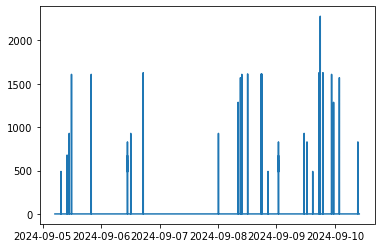

In [74]:
plt.plot(appliance_level_consumption["kettle"]["2024-09-05 05:00:00":"2024-09-10 10:00:00"])

In [49]:
start_time

Timestamp('2024-12-13 03:04:00')

In [62]:
df.to_csv("cooking_100days.csv")

In [61]:
print(df["2024-09-04 00:00:00":"2024-09-09 00:00:00"])

                     aggregate
2024-09-04 00:00:00        0.0
2024-09-04 00:00:30        0.0
2024-09-04 00:01:00        0.0
2024-09-04 00:01:30        0.0
2024-09-04 00:02:00        0.0
...                        ...
2024-09-08 23:58:00        0.0
2024-09-08 23:58:30        0.0
2024-09-08 23:59:00        0.0
2024-09-08 23:59:30        0.0
2024-09-09 00:00:00        0.0

[14401 rows x 1 columns]
